In [63]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib

In [64]:
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

In [65]:
dataFrame = pd.DataFrame(columns = ["키", "몸무게"])
dataFrame.loc[0] = [185,60]
dataFrame.loc[1] = [180,60]
dataFrame.loc[2] = [185,70]
dataFrame.loc[3] = [165,63]
dataFrame.loc[4] = [155,68]
dataFrame.loc[5] = [170,75]
dataFrame.loc[6] = [175,80]

In [66]:
dataFrame

,키,몸무게
0,185,60
1,180,60
2,185,70
3,165,63
4,155,68
5,170,75
6,175,80


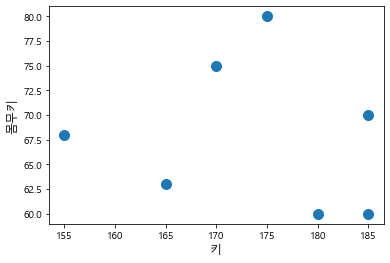

In [67]:
plt.scatter(dataFrame["키"], dataFrame["몸무게"], s = 100) # s = size
plt.xlabel('키', fontsize = 12)
plt.ylabel('몸무키', fontsize = 12)

plt.show()

In [68]:
kmeans = KMeans(n_clusters = 3).fit(dataFrame.values)
print(kmeans)
print(kmeans.labels_)
print(kmeans.cluster_centers_) # 클러스트 중심 값

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)
[1 1 1 0 0 2 2]
[[160.          65.5       ]
 [183.33333333  63.33333333]
 [172.5         77.5       ]]


In [69]:
dataFrame["clusterID"] = kmeans.labels_
dataFrame

,키,몸무게,clusterID
0,185,60,1
1,180,60,1
2,185,70,1
3,165,63,0
4,155,68,0
5,170,75,2
6,175,80,2


In [70]:
df0 = dataFrame[dataFrame["clusterID"] == 0]
df1 = dataFrame[dataFrame["clusterID"] == 1]
df2 = dataFrame[dataFrame["clusterID"] == 2]

print(df0)
print(df1)
print(df2)

     키 몸무게  clusterID
3  165  63          0
4  155  68          0
     키 몸무게  clusterID
0  185  60          1
1  180  60          1
2  185  70          1
     키 몸무게  clusterID
5  170  75          2
6  175  80          2


[[160.          65.5       ]
 [183.33333333  63.33333333]
 [172.5         77.5       ]]


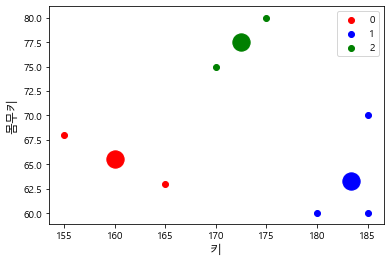

In [62]:
plt.scatter(df0["키"], df0["몸무게"], c = "r", label = "0")
plt.scatter(df1["키"], df1["몸무게"], c = "b", label = "1")
plt.scatter(df2["키"], df2["몸무게"], c = "g", label = "2")

print(kmeans.cluster_centers_)

i = 0
for center in kmeans.cluster_centers_:
    color = "r"
    if i == 1:
        color = "b"
    elif i == 2:
        color = "g"
    
    plt.scatter(center[0], center[1], c = color, s = 300)
    i = i + 1

plt.xlabel('키', fontsize = 12)
plt.ylabel('몸무키', fontsize = 12)
plt.legend()

plt.show()